# Description

Generates the figure for top cell types for a specified LV (in Settings section below).

# Modules loading

In [1]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data.recount2 import LVAnalysis
from utils import chunker
import conf

# Settings

In [2]:
LV_NAME = "LV455"

In [69]:
LV_AXIS_THRESHOLD = 1.5  # 3.0
# LV_AXIS_THRESHOLD = 2.0
N_TOP_SAMPLES = 400
N_TOP_ATTRS = 15

In [4]:
# OUTPUT_FIGURES_DIR = Path(
#     conf.MANUSCRIPT["FIGURES_DIR"], "lvs_analysis", f"{LV_NAME.lower()}"
# ).resolve()
# display(OUTPUT_FIGURES_DIR)
# OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

In [5]:
# OUTPUT_CELL_TYPE_FILEPATH = OUTPUT_FIGURES_DIR / f"{LV_NAME.lower()}-cell_types.svg"
# display(OUTPUT_CELL_TYPE_FILEPATH)

# Load MultiPLIER summary

In [6]:
multiplier_model_summary = pd.read_pickle(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [7]:
multiplier_model_summary.shape

(2157, 5)

In [8]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [9]:
# INPUT_SUBSET = "z_score_std"

In [10]:
# INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [11]:
# input_filepath = Path(
#     conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
#     INPUT_SUBSET,
#     f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
# ).resolve()
# display(input_filepath)

# assert input_filepath.exists(), "Input file does not exist"

# input_filepath_stem = input_filepath.stem
# display(input_filepath_stem)

In [12]:
# data = pd.read_pickle(input_filepath)

In [13]:
# data.shape

In [14]:
# data.head()

## LV data

In [15]:
# lv_obj = LVAnalysis(LV_NAME, data)
lv_obj = LVAnalysis(LV_NAME)

In [16]:
multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((LV_NAME[2:],))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]

,pathway,LV index,AUC,p-value,FDR


In [17]:
lv_data = lv_obj.get_experiments_data()

SRP008145, SRP014320, SRP057196, SRP066834, SRP055569, SRP007947, SRP042161, SRP005279, SRP060416, SRP055810, SRP009266, SRP029334, SRP050499, SRP063840, SRP051472, SRP018837, SRP058773, SRP057205, SRP041751, SRP027383, SRP008775, SRP033135, SRP014428, SRP015853, SRP059035, SRP041008, SRP037722, SRP048820, SRP017777, SRP019994, SRP029452, SRP011903, SRP048640, SRP059197, SRP011422, SRP066994, SRP059057, SRP007569, SRP035599, SRP063493, SRP056395, SRP029880, SRP007461, SRP064464, 

/opt/code/libs/data/recount2.py:360: UserWarning: Not all experiments data could be loaded (40 != 44)
  warnings.warn(


In [18]:
lv_data.shape

(5749, 75)

In [19]:
lv_data.head()

treatment   cell line  \
project   run                                                 
SRP008145 SRR342832              DMSO (5 hours)  HEK293T/17   
          SRR342834              DMSO (5 hours)  HEK293T/17   
          SRR342835              DMSO (5 hours)  HEK293T/17   
          SRR342836              DMSO (5 hours)  HEK293T/17   
          SRR342839  100 uM forskolin (5 hours)  HEK293T/17   

                                   sample type       reporter tissue  \
project   run                                                          
SRP008145 SRR342832  embyonic kidney cell line  CRE multi-hit    NaN   
          SRR342834  embyonic kidney cell line  CRE multi-hit    NaN   
          SRR342835  embyonic kidney cell line  CRE multi-hit    NaN   
          SRR342836  embyonic kidney cell line  CRE multi-hit    NaN   
          SRR342839  embyonic kidney cell line  CRE multi-hit    NaN   

                    cell type  age c1 chip id experiment_sample_name Stage  \
project   run                                                                
SRP008145 SRR342832       NaN  NaN        NaN                    NaN   NaN   
          SRR342834       NaN  NaN        NaN                    NaN   NaN   
          SRR342835       NaN  NaN        NaN                    NaN   NaN   
          SRR342836       NaN  NaN        NaN                    NaN   NaN   
          SRR342839       NaN  NaN        NaN                    NaN   NaN   

                     ...  Sex sf3b1 mutation strain ajcc stage  \
project   run        ...                                         
SRP008145 SRR342832  ...  NaN            NaN    NaN        NaN   
          SRR342834  ...  NaN            NaN    NaN        NaN   
          SRR342835  ...  NaN            NaN    NaN        NaN   
          SRR342836  ...  NaN            NaN    NaN        NaN   
          SRR342839  ...  NaN            NaN    NaN        NaN   

                    assigned cell type qc pass cell count ercc_mix  \
project   run                                                        
SRP008145 SRR342832                NaN     NaN        NaN      NaN   
          SRR342834                NaN     NaN        NaN      NaN   
          SRR342835                NaN     NaN        NaN      NaN   
          SRR342836                NaN     NaN        NaN      NaN   
          SRR342839                NaN     NaN        NaN      NaN   

                    ercc_dilution     LV455  
project   run                                
SRP008145 SRR342832           NaN  3.977208  
          SRR342834           NaN  0.636918  
          SRR342835           NaN  0.077617  
          SRR342836           NaN  0.151259  
          SRR342839           NaN  3.381660  

[5 rows x 75 columns]

# LV cell types analysis

## Get top attributes

In [20]:
lv_attrs = lv_obj.get_attributes_variation_score()
display(lv_attrs.head(20))

reporter                                   5.994306
treatment                                  2.709171
sample type                                2.251943
cell line                                  0.235008
immunoprecipitated protein                 0.004472
crosslinker and crosslinking wavelength    0.004472
antibody                                   0.004472
c1 chip id                                 0.003361
experiment_sample_name                     0.003361
age                                        0.003292
bcp all subtype                            0.002462
cancer or normal                           0.002346
tissue                                     0.002084
differentiation stage                      0.001899
embryo number                              0.001887
lineage                                    0.001887
Stage                                      0.001809
all lineage                                0.001753
developmental stage                        0.001295
gfp         

In [22]:
# show those with cell type or tissue in their name
_tmp = pd.Series(lv_attrs.index)
lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)

tissue       0.002084
cell type    0.001221
dtype: float64

In [27]:
_tmp = lv_data.loc[
    :,
    [
        "cell line",
        "tissue",
        "cell type",
        # "tissue subtype",
        # "tissue type",
        LV_NAME,
    ],
]

In [28]:
_tmp_seq = list(chunker(_tmp.sort_values(LV_NAME, ascending=False), 25))

In [29]:
_tmp_seq[0]

cell line  \
project   run                      
SRP008145 SRR342846   HEK293T/17   
          SRR342832   HEK293T/17   
          SRR342839   HEK293T/17   
          SRR342862   HEK293T/17   
          SRR342834   HEK293T/17   
          SRR342848   HEK293T/17   
SRP057196 SRR1974781         NaN   
SRP008145 SRR342850   HEK293T/17   
          SRR342861   HEK293T/17   
SRP066834 SRR2967412         NaN   
SRP057196 SRR1974951         NaN   
          SRR1974968         NaN   
SRP008145 SRR342849   HEK293T/17   
          SRR342841   HEK293T/17   
SRP055569 SRR1821383         NaN   
SRP007947 SRR333717          NaN   
SRP042161 SRR1295218        CSC6   
SRP055569 SRR2019226         NaN   
SRP057196 SRR1974891         NaN   
SRP042161 SRR1294514         NaN   
SRP066834 SRR2967605         NaN   
SRP055569 SRR2019233         NaN   
SRP057196 SRR1974723         NaN   
SRP066834 SRR2967468         NaN   
SRP005279 SRR091667          NaN   

                                                                 tissue  \
project   run                                                             
SRP008145 SRR342846                                                 NaN   
          SRR342832                                                 NaN   
          SRR342839                                                 NaN   
          SRR342862                                                 NaN   
          SRR342834                                                 NaN   
          SRR342848                                                 NaN   
SRP057196 SRR1974781                                             cortex   
SRP008145 SRR342850                                                 NaN   
          SRR342861                                                 NaN   
SRP066834 SRR2967412                Dissociated whole cerebral organoid   
SRP057196 SRR1974951                                             cortex   
          SRR1974968                                             cortex   
SRP008145 SRR342849                                                 NaN   
          SRR342841                                                 NaN   
SRP055569 SRR1821383                                                NaN   
SRP007947 SRR333717                                                 NaN   
SRP042161 SRR1295218                                                NaN   
SRP055569 SRR2019226                                                NaN   
SRP057196 SRR1974891                                             cortex   
SRP042161 SRR1294514                                                NaN   
SRP066834 SRR2967605  Microdissected cortical-like ventricle from ce...   
SRP055569 SRR2019233                                                NaN   
SRP057196 SRR1974723                                             cortex   
SRP066834 SRR2967468  Microdissected cortical-like ventricle from ce...   
SRP005279 SRR091667                                         Bone marrow   

                                                              cell type  \
project   run                                                             
SRP008145 SRR342846                                                 NaN   
          SRR342832                                                 NaN   
          SRR342839                                                 NaN   
          SRR342862                                                 NaN   
          SRR342834                                                 NaN   
          SRR342848                                                 NaN   
SRP057196 SRR1974781                                        endothelial   
SRP008145 SRR342850                                                 NaN   
          SRR342861                                                 NaN   
SRP066834 SRR2967412                                                NaN   
SRP057196 SRR1974951                                    fetal_quiescent   
          SRR1974968                             

In [26]:
# what is there in these projects?
lv_data.loc[["SRP008145"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
).sort_values(LV_NAME, ascending=False).head(10)

treatment   cell line  \
project   run                                                        
SRP008145 SRR342846         100 uM forskolin (5 hours)  HEK293T/17   
          SRR342832                     DMSO (5 hours)  HEK293T/17   
          SRR342839         100 uM forskolin (5 hours)  HEK293T/17   
          SRR342862  Sendai virus (MOI = 10, 16 hours)  HEK293T/17   
          SRR342834                     DMSO (5 hours)  HEK293T/17   
          SRR342848         100 uM forskolin (5 hours)  HEK293T/17   
          SRR342850         100 uM forskolin (5 hours)  HEK293T/17   
          SRR342861  Sendai virus (MOI = 10, 16 hours)  HEK293T/17   
          SRR342849         100 uM forskolin (5 hours)  HEK293T/17   
          SRR342841         100 uM forskolin (5 hours)  HEK293T/17   

                                   sample type         reporter     LV455  
project   run                                                              
SRP008145 SRR342846  embyonic kidney cell line   CRE single-hit  9.929934  
          SRR342832  embyonic kidney cell line    CRE multi-hit  3.977208  
          SRR342839  embyonic kidney cell line    CRE multi-hit  3.381660  
          SRR342862  embyonic kidney cell line  IFNB single-hit  0.718741  
          SRR342834  embyonic kidney cell line    CRE multi-hit  0.636918  
          SRR342848  embyonic kidney cell line   CRE single-hit  0.620987  
          SRR342850  embyonic kidney cell line   CRE single-hit  0.524551  
          SRR342861  embyonic kidney cell line  IFNB single-hit  0.471009  
          SRR342849  embyonic kidney cell line   CRE single-hit  0.439257  
          SRR342841  embyonic kidney cell line    CRE multi-hit  0.294857

In [30]:
SELECTED_ATTRIBUTE = "cell line"

In [31]:
# it has to be in the order desired for filling nans in the SELECTED_ATTRIBUTE
SECOND_ATTRIBUTES = ["tissue", "cell type"]

## Get plot data

In [70]:
plot_data = lv_data.loc[:, [SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES + [LV_NAME]]

In [71]:
# if blank/nan, fill cell type column with tissue content
_new_column = plot_data[[SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES].fillna(
    method="backfill", axis=1
)[SELECTED_ATTRIBUTE]
plot_data[SELECTED_ATTRIBUTE] = _new_column
plot_data = plot_data.drop(columns=SECOND_ATTRIBUTES)
plot_data = plot_data.fillna({SELECTED_ATTRIBUTE: "NOT CATEGORIZED"})
# plot_data = plot_data.dropna(subset=[SELECTED_ATTRIBUTE])

In [72]:
plot_data = plot_data.sort_values(LV_NAME, ascending=False)

In [73]:
plot_data.head(20)

cell line  \
project   run                                                             
SRP008145 SRR342846                                          HEK293T/17   
          SRR342832                                          HEK293T/17   
          SRR342839                                          HEK293T/17   
          SRR342862                                          HEK293T/17   
          SRR342834                                          HEK293T/17   
          SRR342848                                          HEK293T/17   
SRP057196 SRR1974781                                             cortex   
SRP008145 SRR342850                                          HEK293T/17   
          SRR342861                                          HEK293T/17   
SRP066834 SRR2967412                Dissociated whole cerebral organoid   
SRP057196 SRR1974951                                             cortex   
          SRR1974968                                             cortex   
SRP008145 SRR342849                                          HEK293T/17   
          SRR342841                                          HEK293T/17   
SRP055569 SRR1821383                             U87 human glioma cells   
SRP007947 SRR333717                                     testicular germ   
SRP042161 SRR1295218                                               CSC6   
SRP055569 SRR2019226  mixture of U87 human glioma cells and WI-38 hu...   
SRP057196 SRR1974891                                             cortex   
SRP042161 SRR1294514                                       Glioblastoma   

                         LV455  
project   run                   
SRP008145 SRR342846   9.929934  
          SRR342832   3.977208  
          SRR342839   3.381660  
          SRR342862   0.718741  
          SRR342834   0.636918  
          SRR342848   0.620987  
SRP057196 SRR1974781  0.525810  
SRP008145 SRR342850   0.524551  
          SRR342861   0.471009  
SRP066834 SRR2967412  0.462463  
SRP057196 SRR1974951  0.459577  
          SRR1974968  0.459556  
SRP008145 SRR342849   0.439257  
          SRR342841   0.294857  
SRP055569 SRR1821383  0.273530  
SRP007947 SRR333717   0.267689  
SRP042161 SRR1295218  0.260117  
SRP055569 SRR2019226  0.256768  
SRP057196 SRR1974891  0.234436  
SRP042161 SRR1294514  0.228506

## Customize x-axis values

When cell type values are not very clear, customize their names by looking at their specific studies to know exactly what the authors meant.

In [74]:
final_plot_data = plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            # "human bone marrow sample": "bone marrow",
            "whole blood": "Whole blood",
            # "peripheral blood": "Peripheral blood",
            # "peripheral whole blood": "Peripheral blood",
            # "breast cancer": "Breast cancer",
            # "breast cancer cell line": "Breast cancer",
            # SRP057196
            # "fetal_replicating": "Fetal neurons (replicating)",
            # "fetal_quiescent": "Fetal neurons (quiescent)",
            # "normal skin": "Skin",
            # "liver": "Liver",
            # "Human Skeletal Muscle Myoblasts (HSMM)": "Skeletal muscle myoblasts",
            # "astrocytes": "Astrocytes",
            "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma + MCF10 breast cancer cells",
            "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma + WI-38 lung fibroblast cells",
            # "functional hepatocytes generated by lineage reprogramming": "Hepatocytes",
            # "human adipose-derived stem cells": "Adipose-derived stem cells",
            # "adipose": "Adipose",
            # "embryonic stem cells": "Embryonic stem cells",
            # "primary keratinocytes": "Primary keratinocytes",
            # "fetal liver": "Fetal liver",
            # "in vitro differentiated erythroid cells": "Erythroid cells",
            # "WAT": "White adipose tissue",
            # "BAT": "Brown adipose tissue",
            # "Uninvolved Breast Tissue Adjacent to ER+ Primary Tumor": "Breast tissue adjacent to ER+ tumor",
            # "ovarian granulosa cells": "Ovarian granulosa cells",
        }
    }
)

In [75]:
# sorte index to avoid PerformanceWarning from pandas
final_plot_data = final_plot_data.sort_index()

In [76]:
_srp_code = "SRP060416"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: x[SELECTED_ATTRIBUTE]
    + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [77]:
# _srp_code = "SRP059172"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: x[SELECTED_ATTRIBUTE]
#     + f" ({lv_data.loc[(_srp_code, x.name), 'group']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [78]:
# _srp_code = "SRP062966"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: x[SELECTED_ATTRIBUTE]
#     + f" ({lv_data.loc[(_srp_code, x.name), 'disease status']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [79]:
# _srp_code = "SRP064464"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: f"Pancreatic islets"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'assigned cell type']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [80]:
# _srp_code = "SRP029990" # these cases seem to be the same in SRP032775 and are just a few
# final_plot_data = final_plot_data.drop((_srp_code,))

In [81]:
# _srp_code = "SRP032775" # this one is also about Maralia

# main_attr = "time point"
# second_attrs = ["time-point"]

# def _apply_func(x):
#     return "Whole blood" + f" ({x[main_attr].lower()}, Malaria)"

# _lv_data = lv_data.loc[(_srp_code,), [main_attr] + second_attrs + [LV_NAME]]
# _new_column = _lv_data[[main_attr] + second_attrs].fillna(
#     method="backfill", axis=1
# )[main_attr]
# _lv_data[main_attr] = _new_column
# # _lv_data = _lv_data.drop(columns=second_attrs)

# _tmp = _lv_data.apply(
#     _apply_func,
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [82]:
# _srp_code = "SRP059039"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: x[SELECTED_ATTRIBUTE]
#     + f" ({lv_data.loc[(_srp_code, x.name), 'group']} cases)",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [83]:
# _srp_code = "SRP056443"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: x[SELECTED_ATTRIBUTE]
#     + f" ({lv_data.loc[(_srp_code, x.name), 'time']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [84]:
# _srp_code = "SRP056840"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Whole blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'sirs outcomes']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [85]:
# _srp_code = "SRP050000"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood (SIRS or sepsis)",
#     # + f" ({lv_data.loc[(_srp_code, x.name), 'sirs outcomes']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [86]:
# _srp_code = "SRP045500"
# _tmp = lv_data.loc[(_srp_code,)].apply(
#     lambda x: x["celltype"],
#     # + f" ({lv_data.loc[(_srp_code, x.name), 'sirs outcomes']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [87]:
# _srp_code = "SRP058773"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: f"Fibroblasts",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [88]:
# _srp_code = "SRP027015"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood (MM.1S)",
#     # + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [89]:
# _srp_code = "SRP061329"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [90]:
# _srp_code = "SRP018838"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [91]:
# # take the top samples only
# final_plot_data = final_plot_data.sort_values(LV_NAME, ascending=False)[:N_TOP_SAMPLES]

## Threshold LV values

In [92]:
if LV_AXIS_THRESHOLD is not None:
    final_plot_data.loc[
        final_plot_data[LV_NAME] > LV_AXIS_THRESHOLD, LV_NAME
    ] = LV_AXIS_THRESHOLD

## Delete samples with no tissue/cell type information

In [93]:
# final_plot_data = final_plot_data[
#     final_plot_data[SELECTED_ATTRIBUTE] != "NOT CATEGORIZED"
# ]

## Set x-axis order

In [94]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .max()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [95]:
len(attr_order)

15

In [96]:
attr_order[:5]

['HEK293T/17',
 'cortex',
 'Dissociated whole cerebral organoid',
 'U87 human glioma cells',
 'testicular germ']

## Plot

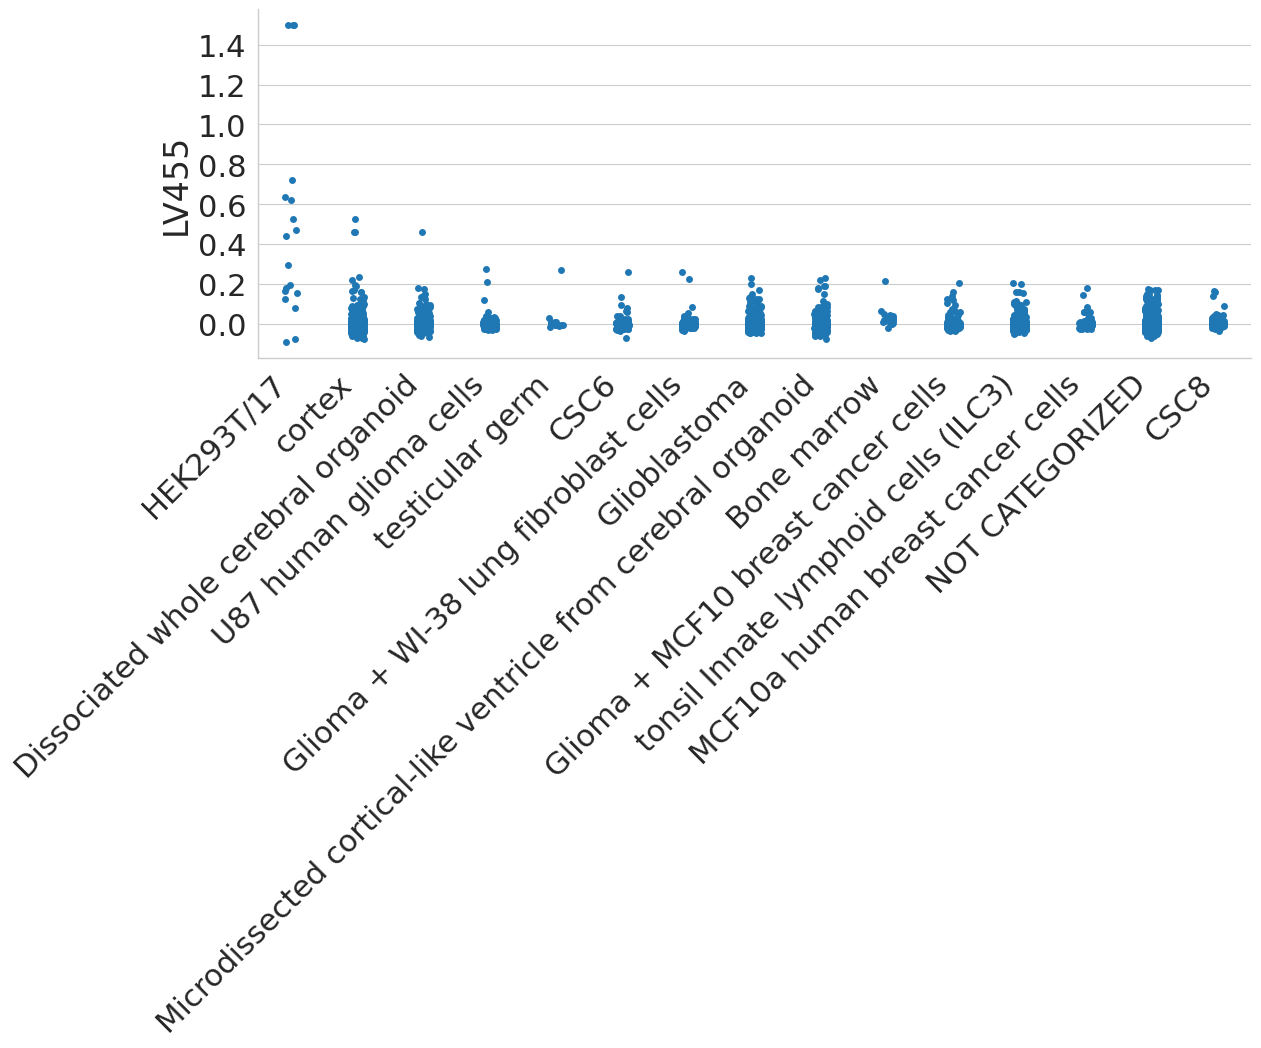

In [97]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="strip",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

In [56]:
# with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
#     g = sns.catplot(
#         data=final_plot_data,
#         y=LV_NAME,
#         x=SELECTED_ATTRIBUTE,
#         order=attr_order,
#         kind="box",
#         height=5,
#         aspect=2.5,
#     )
#     plt.xticks(rotation=45, horizontalalignment="right")
#     plt.xlabel("")

#     # plt.savefig(
#     #     OUTPUT_CELL_TYPE_FILEPATH,
#     #     bbox_inches="tight",
#     #     facecolor="white",
#     # )

# Debug

In [ ]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
):
    _tmp = final_plot_data[final_plot_data[SELECTED_ATTRIBUTE].str.contains("^NOT CATEGORIZED$")].sort_values(LV_NAME, ascending=False)
    display(_tmp.head(20))

In [ ]:
# what is there in these projects?
_tmp = lv_data.loc[["SRP045500"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
)

display(_tmp.head(60))

In [ ]:
_tmp["sirs outcomes"].value_counts()

# Reduced plot

## Data stats

In [ ]:
plot_data_stats = final_plot_data.describe()[LV_NAME]
display(plot_data_stats)

In [ ]:
plot_data_stats_by_cell_type = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .describe()[LV_NAME]
    .sort_values("50%", ascending=False)
)
display(plot_data_stats_by_cell_type)

In [ ]:
# keep cell types whose median is larger than the global median
selected_cell_types = plot_data_stats_by_cell_type[
    (plot_data_stats_by_cell_type["50%"] > max(plot_data_stats.loc["50%"], 0.0))
].index
display(selected_cell_types)

In [ ]:
final_plot_data.shape

In [ ]:
final_plot_data = final_plot_data[
    final_plot_data[SELECTED_ATTRIBUTE].isin(selected_cell_types)
]

In [ ]:
final_plot_data.shape

## Set x-axis order

In [ ]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .median()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [ ]:
len(attr_order)

In [ ]:
attr_order[:5]

## Plot

In [ ]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )